In [ ]:
## Sin wave Transformation in logistic (decision function)

In [1]:
!pwd

/home/jovyan


In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_circles, make_moons, make_blobs
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [96]:
X, y = make_moons(n_samples = 100, shuffle = True, noise = 0)

In [3]:
X.shape

(100, 2)

In [109]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [145]:
stuff = product([0, 1,2], [0, 1]) # ,[0,1]
#stuff = product([1, 0,0], [0, 1,0]) # ,[0,1]

In [151]:
#stuff = product([1, 0,0], [0, 1,0]) # ,[0,1]
next( stuff)

(1, 2)

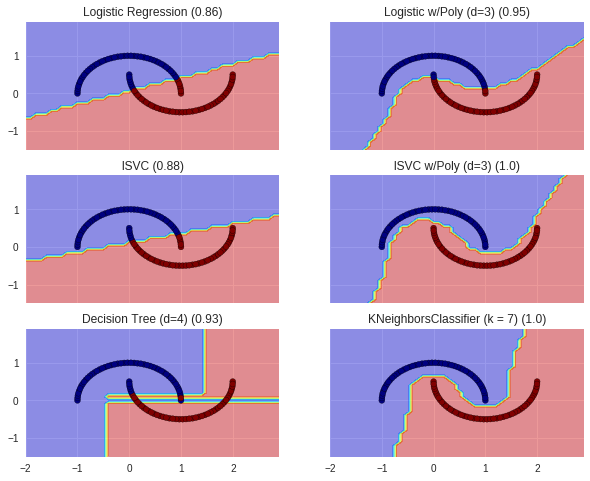

In [157]:
from itertools import product
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

clf1 = LogisticRegression()
clf2 = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('logit', LogisticRegression())
])
clf3 = LinearSVC()
clf4 = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('lsvc', LinearSVC())
])
clf5 = DecisionTreeClassifier(max_depth=4)
clf6 = KNeighborsClassifier(n_neighbors=7)


clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)
clf5.fit(X, y)
clf6.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1,2], [0, 1]),
                        [clf1, clf2, clf3, clf4,clf5, clf6],
                        ['Logistic Regression', 'Logistic w/Poly (d=3)',
                         'lSVC', 'lSVC w/Poly (d=3)',
                         'Decision Tree (d=4)',
                         'KNeighborsClassifier (k = 7)'
                        ]): 

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    y_predicted = clf.predict( X)
    score = str(clf.score(X,y))

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4, cmap=cm.jet)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y_predicted,  #c=y
                                  s=35, edgecolor='k', cmap=cm.jet)
    axarr[idx[0], idx[1]].set_title(tt + ' (' + score + ')')
    #axarr[idx[0], idx[1]].text( 0,2, score )

plt.show()


0.86


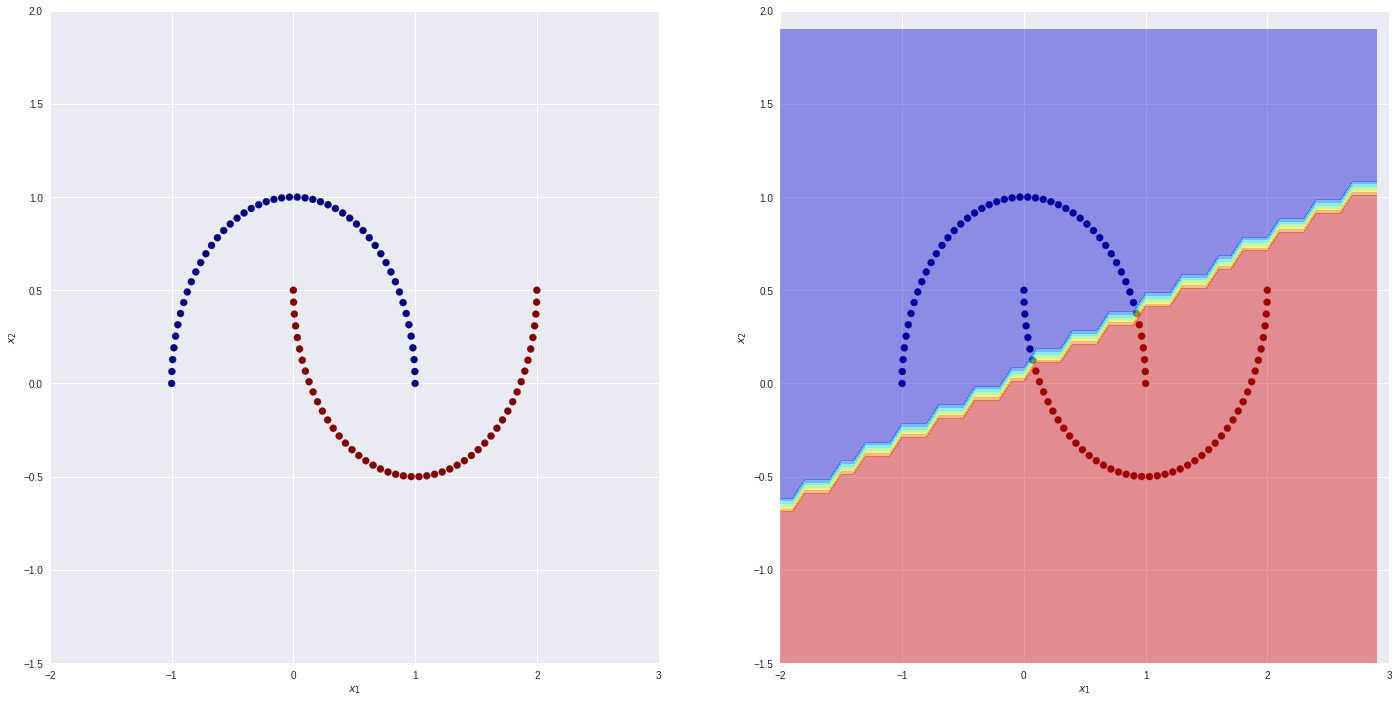

In [103]:
logit = LogisticRegression()
logit.fit( X, y)

y_predict = logit.predict( X)
betas = np.c_[ logit.intercept_, logit.coef_]
betas = betas[0]
print( logit.score( X, y))

## Create Mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

ZZ = logit.predict(np.c_[xx.ravel(), yy.ravel()]) #mesh_transform
ZZ = ZZ.reshape(xx.shape)

## Decision Boundary Line
xx_line = np.arange( x_min, x_max, 0.01)
yy_line = (betas[0] + betas[1]*xx_line)/-betas[2]

f, (ax1, ax2) = plt.subplots( 1,2, figsize = (24,12))


ax1.scatter( X[:,0], X[:, 1], c = y,  cmap=cm.jet)
ax1.set_xlabel(r'$x_{1}$')
ax1.set_ylabel(r'$x_{2}$')
ax1.set_xlim( x_min, x_max )
ax1.set_ylim(y_min, y_max)


ax2.scatter( X[:,0], X[:, 1], c = y_predict,  cmap=cm.jet)
ax2.contourf(xx, yy, ZZ, alpha=0.4, cmap=cm.jet)
ax2.set_xlabel(r'$x_{1}$')
ax2.set_ylabel(r'$x_{2}$')
ax2.set_xlim( x_min, x_max )
ax2.set_ylim(y_min, y_max)

plt.show()

In [98]:
logit = LogisticRegression()
logit.fit( X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
y_predict = logit.predict( X)

0.86


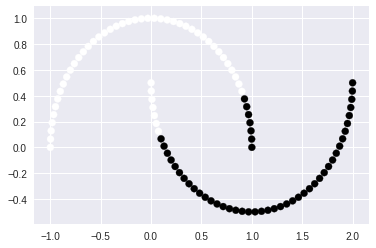

In [8]:
print( logit.score( X, y))
plt.scatter( X[:,0], X[:, 1], c = y_predict)
plt.show()

In [9]:
r = np.sqrt(X[:,0]**2 + X[:,1]**2)

theta = np.arctan2( X[:,1], X[:,0])

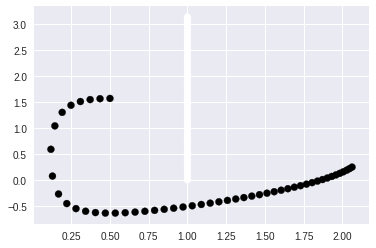

In [10]:
plt.scatter(r, theta, c = y)

In [11]:
x0_2 = X[:,0]**2
x1_2 = X[:,1]**2
x11 = X[:,0]*X[:,1]



In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(5)

X_poly = poly.fit_transform( X)
X_poly.shape

(100, 21)

In [14]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x0^2',
 'x0 x1',
 'x1^2',
 'x0^3',
 'x0^2 x1',
 'x0 x1^2',
 'x1^3',
 'x0^4',
 'x0^3 x1',
 'x0^2 x1^2',
 'x0 x1^3',
 'x1^4',
 'x0^5',
 'x0^4 x1',
 'x0^3 x1^2',
 'x0^2 x1^3',
 'x0 x1^4',
 'x1^5']

In [15]:
logit = LogisticRegression()

In [16]:
poly_fit = logit.fit( X_poly, y)

In [17]:
y_poly_predict = logit.predict( X_poly)

In [19]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

mesh_transform = poly.fit_transform( np.c_[xx.ravel(), yy.ravel()])
#mesh_transform.shape
Z = logit.predict(mesh_transform)
Z = Z.reshape(xx.shape)
#Z = Z.reshape(xx.shape)

Z.shape

(35, 50)

1.0


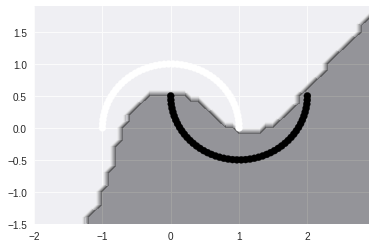

In [20]:
print( logit.score( X_poly, y))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter( X[:,0], X[:, 1], c = y_poly_predict)
plt.show()

In [ ]:
## Test Make Blobs for Linear Decision Boundary



X, Y = make_blobs(n_samples=100, n_features=2, centers=2, 
                    cluster_std=3, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

logit = LogisticRegression( random_state=42)

logit.fit( xb, yb)
betas = np.c_[ logit.intercept_, logit.coef_]
betas = betas[0]
y_predict = logit.predict(xb)

logit.score(xb, yb)

betas

## Generate mesh for countour
x_min, x_max = xb[:, 0].min() - 1, xb[:, 0].max() + 1
y_min, y_max = xb[:, 1].min() - 1, xb[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

ZZ = logit.predict(np.c_[xx.ravel(), yy.ravel()]) #mesh_transform
ZZ = ZZ.reshape(xx.shape)

## Decision Boundary
xx_line = np.arange( x_min, x_max, 0.01)
yy_line = (betas[0] + betas[1]*xx_line)/-betas[2]


#plt.figure( figsize = (9,12) )

f, (ax1, ax2, ax3) = plt.subplots( nrows = 1, ncols=3, figsize=(27,9) )  ## sharey = True, sharex=True
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$') # (r - \theta)
plt.xlim( x_min-5, x_max+5 )
plt.ylim( y_min-5, y_max+5)

ax1.scatter( xb[:,0], xb[:,1], c = yb, cmap=cm.jet)# Pastel2_r  Vega10_r
ax1.set_xlabel(r'$x_{1}$')
ax1.set_ylabel(r'$x_{2}$')
ax1.set_xlim( x_min, x_max )
ax1.set_ylim(y_min, y_max)

ax2.scatter( xb[:,0], xb[:,1], c = yb, cmap=cm.jet)# Pastel2_r  Vega10_r
ax2.plot(xx_line, yy_line)
ax2.set_xlabel(r'$x_{1}$')
ax2.set_ylabel(r'$x_{2}$')
ax2.set_xlim( x_min, x_max )
ax2.set_ylim(y_min, y_max)

ax3.contourf(xx, yy, ZZ, alpha=0.4, cmap=cm.jet)
ax3.scatter( xb[:,0], xb[:, 1], c = y_predict, cmap=cm.jet) # y_predict
ax3.set_xlabel(r'$x_{1}$')
ax3.set_ylabel(r'$x_{2}$')
ax3.set_xlim( x_min, x_max )
ax3.set_ylim(y_min, y_max)

from itertools import product
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = DecisionTreeClassifier(max_depth=4)
clf4 = KNeighborsClassifier(n_neighbors=7)


clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),  # product([0, 1,2], [0, 1])
                        [clf1, clf2, clf3, clf4,clf5, clf6],
                        ['Logistic Regression', #'Logistic w/Poly (d=3)',
                         'lSVC', #'lSVC w/Poly (d=3)',
                         'Decision Tree (d=4)',
                         'KNeighborsClassifier (k = 7)'
                        ]): 

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    y_predicted = clf.predict( X)
    score = str(clf.score(X,y))

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4, cmap=cm.jet)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y_predicted,  #c=y
                                  s=20, edgecolor='k', cmap=cm.jet)
    axarr[idx[0], idx[1]].set_title(tt + ' (' + score + ')')
    #axarr[idx[0], idx[1]].text( 0,2, score )

plt.show()


print( logit.score( xb, yb))
#plt.rc('text', usetex=True)
plt.contourf(xx, yy, ZZ, alpha=0.4, cmap=cm.jet)
plt.plot(xx_line, yy_line)
#plt.plot()
plt.scatter( xb[:,0], xb[:, 1], c = yb, cmap=cm.jet) # y_predict
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$') # (r - \theta)
plt.xlim( x_min, x_max )
plt.ylim( y_min, y_max )

plt.show()

logit = LogisticRegression( random_state=42)

logit = LogisticRegression( random_state=42)

logit.fit( xb, yb)
betas = np.c_[ logit.intercept_, logit.coef_]
y_predict = logit.predict(xb)

logit.score(xb, yb)

logit.score(xb, yb)

y_predict = logit.predict(xb)

betas = np.c_[ logit.intercept_, logit.coef_]

betas = betas[0]
betas

x_min, x_max = xb[:, 0].min() - 1, xb[:, 0].max() + 1
y_min, y_max = xb[:, 1].min() - 1, xb[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

ZZ = logit.predict(np.c_[xx.ravel(), yy.ravel()]) #mesh_transform
ZZ = ZZ.reshape(xx.shape)

xx_line = np.arange( x_min, x_max, 0.01)

betas = np.c_[ logit.intercept_, logit.coef_]

yy_line = (betas[0] + betas[1]*xx_line)/-betas[2]

ZZ.shape

xx_line = np.arange( x_min, x_max, 0.01)

yy_line = (betas[0] + betas[1]*xx_line)/-betas[2]
plt.plot(xx_line, yy_line)

print( logit.score( xb, yb))
#plt.rc('text', usetex=True)
plt.contourf(xx, yy, ZZ, alpha=0.4, cmap=cm.jet)
plt.plot(xx_line, yy_line)
#plt.plot()
plt.scatter( xb[:,0], xb[:, 1], c = y_predict, cmap=cm.jet)
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$') # (r - \theta)
plt.show()

## Example Decision Boundary


In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
clf = LogisticRegression().fit(X[:100], y[:100])

In [ ]:
X.shape

In [ ]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1]#.reshape(xx.shape)

In [ ]:
test1 = np.tile(xx.ravel(),(2,1))
test1.shape

In [ ]:
grid.shape, probs.shape, xx.shape, yy.shape 

In [ ]:
xx.shape, yy.shape

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")